## Spike's blood glucose log

In [2]:
%pylab nbagg
import datetime 
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


In [10]:
entries = np.array([[datetime.datetime(year=2018, month=11, day=1,hour=8,minute=15),\
                    datetime.datetime(year=2018, month=11, day=1,hour=9,minute=30),\
                    datetime.datetime(year=2018, month=11, day=1,hour=11,minute=16),\
                     datetime.datetime(year=2018, month=11, day=1,hour=12,minute=10),\
                    datetime.datetime(year=2018, month=11, day=1,hour=13,minute=30),\
                    datetime.datetime(year=2018, month=11, day=1,hour=15,minute=16)],
                    [220,96,94,141,190,352]])



In [11]:
# convert mg/dL to mmol/L
#x = 564
#x1 = (x/1e3)*1e1 #g/L
#x1= x1/.180156 #g/mmol*L div molar mass of glucose in mmol
#print(x1)

for i in range(len(entries[1])):
    entries[1][i] = (entries[1][i]/1e2)/.180156   
print(entries)

[[datetime.datetime(2018, 11, 1, 8, 15)
  datetime.datetime(2018, 11, 1, 9, 30)
  datetime.datetime(2018, 11, 1, 11, 16)
  datetime.datetime(2018, 11, 1, 12, 10)
  datetime.datetime(2018, 11, 1, 13, 30)
  datetime.datetime(2018, 11, 1, 15, 16)]
 [12.211638801927219 5.32871511356824 5.217700215368902 7.826550323053353
  10.546415328937142 19.53862208308355]]


In [12]:
times = []
safe1 = []
ideal1 = []
ideal2 = []

for i in range(0,12):
    times.append(datetime.datetime(year=2018, month=10, day=31,hour=1))
    safe1.append(3.6)
    ideal1.append(16.7)
    ideal2.append(5.6) 

In [13]:
x = mdates.date2num(entries[0])

z4 = np.polyfit(x, entries[1], 2)
p4 = np.poly1d(z4)

<IPython.core.display.Javascript object>


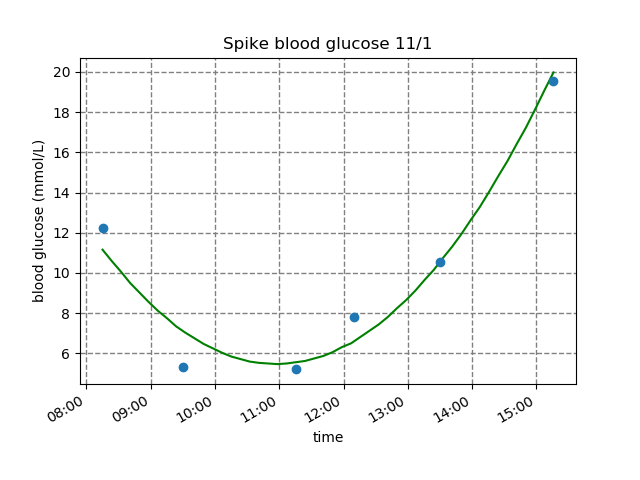

[736999.34375    736999.34971655 736999.35568311 736999.36164966
 736999.36761621 736999.37358277 736999.37954932 736999.38551587
 736999.39148243 736999.39744898 736999.40341553 736999.40938209
 736999.41534864 736999.42131519 736999.42728175 736999.4332483
 736999.43921485 736999.44518141 736999.45114796 736999.45711451
 736999.46308107 736999.46904762 736999.47501417 736999.48098073
 736999.48694728 736999.49291383 736999.49888039 736999.50484694
 736999.51081349 736999.51678005 736999.5227466  736999.52871315
 736999.53467971 736999.54064626 736999.54661281 736999.55257937
 736999.55854592 736999.56451247 736999.57047903 736999.57644558
 736999.58241213 736999.58837868 736999.59434524 736999.60031179
 736999.60627834 736999.6122449  736999.61821145 736999.624178
 736999.63014456 736999.63611111]


In [14]:
#fig, ax = plt.subplots()
ifig=1;close(ifig);figure(ifig)
xx = np.linspace(x.min(), x.max(), 50)
print(xx)
dd = mdates.num2date(xx)
#dd1 = mdates.num2date(1,24)

#plt.plot(safe1,dd1,'r')
plt.plot(dd, p4(xx), '-g')
matplotlib.pyplot.plot_date(entries[0],entries[1])
plt.gcf().autofmt_xdate()
plt.title('Spike blood glucose 11/1')
plt.ylabel('blood glucose (mmol/L)')
plt.xlabel('time')
grid(color='gray', linestyle='--', linewidth=1)
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.savefig('spike2.png')